# K-Means Clustering from Scratch
## Overview 📈  
In this project, I’m implementing a custom **K-Means Clustering** algorithm from scratch using Python and NumPy. K-Means is an unsupervised machine learning algorithm that partitions data into K clusters based on their similarities.

### Key Concepts:
- **K-Means Clustering**: A technique used to partition a dataset into K clusters, where each cluster contains data points that are more similar to each other than to those in other clusters.
  
- **Centroids**: The central points of each cluster, which represent the mean of all points in that cluster.
  
- **Euclidean Distance**: A metric used to measure the distance between points and centroids, helping assign each data point to the nearest centroid.

---

## Objective 🎯  
The goal of this project is to:
1. Implement a custom K-Means clustering algorithm.
   
2. Use Euclidean distance to assign data points to clusters.
   
3. Recalculate centroids and iteratively refine the clusters until convergence.

---

## K-Means Clustering Explanation 🧠

### K-Means Algorithm Overview
K-Means clustering is an iterative algorithm that assigns each data point to one of K clusters. It aims to minimize the variance within clusters. The algorithm follows these steps:

1. **Initialize centroids**: Randomly choose K points as initial centroids.
   
2. **Assign points to clusters**: For each data point, calculate the Euclidean distance to each centroid and assign the point to the closest centroid.
   
3. **Recalculate centroids**: After assigning all points, recalculate the centroids as the mean of all points in each cluster.
   
4. **Repeat**: Repeat steps 2 and 3 until the centroids stabilize or after a set number of iterations.

---

### Euclidean Distance
Euclidean distance is used to calculate the proximity between a data point and a centroid, and it’s defined as:

$$
\text{Distance}(x, c) = \sqrt{\sum_{i=1}^{n} (x_i - c_i)^2}
$$

Where:
- \( x \) is a data point, and \( c \) is a centroid.
- The sum is over all features (dimensions) of the data.

---

### The Process Explained ⚙️

1. **Cluster Assignment**:
   - For each data point, calculate its distance to all centroids.
   - Assign the point to the nearest centroid.
   
2. **Centroid Recalculation**:
   - Once all points are assigned to clusters, calculate the new centroids by computing the mean of all points in each cluster.

3. **Convergence**:
   - The algorithm repeats until the centroids stop changing or after a maximum number of iterations.

---

## Implementation 🛠️

Below is the code for implementing **K-Means Clustering** from scratch. The `KMeans` class includes methods to:
1. **Initialize Centroids**: Randomly choose K points as the initial centroids.
   
2. **Assign Clusters**: For each point, calculate its distance from the centroids and assign it to the nearest centroid.
   
3. **Recalculate Centroids**: Compute the new centroids based on the mean of points in each cluster.
   
4. **Check for Convergence**: Repeat the process until the centroids no longer change significantly or after a set number of iterations.
---

# Let's code the K-Means Clustering 

In [3]:
import numpy as np

class KMeans:
    def __init__(self, k, max_iters=100):
        """
        Initializes the KMeans model.
        
        Parameters:
        - k (int): Number of clusters to form.
        - max_iters (int): Maximum number of iterations for the algorithm.
        """
        self.k = k  # Number of clusters
        self.max_iters = max_iters  # Maximum number of iterations
        self.centroids = None  # Centroids of clusters (initialized during fitting)
        self.clusters = None  # Cluster assignments (initialized during fitting)

    def initialize_centroids(self, X):
        """
        Initializes centroids by randomly selecting k data points from the dataset.
        
        Parameters:
        - X (numpy array): Input data matrix of shape (n_samples, n_features)
        
        Returns:
        - (numpy array): Randomly selected centroids.
        """
        # Randomly choose k unique points from the dataset to serve as initial centroids
        random_indices = np.random.choice(len(X), size=self.k, replace=False)
        return X[random_indices]

    def euclidean_distance(self, a, b):
        """
        Computes the Euclidean distance between two points.
        
        Parameters:
        - a (numpy array): Point A (coordinates of a sample).
        - b (numpy array): Point B (coordinates of a centroid).
        
        Returns:
        - (float): Euclidean distance between points a and b.
        """
        # Calculate the Euclidean distance using the formula: sqrt(sum((a-b)^2))
        return np.linalg.norm(a - b)

    def assign_clusters(self, X):
        """
        Assigns each data point to the nearest centroid.
        
        Parameters:
        - X (numpy array): Input data matrix of shape (n_samples, n_features)
        
        Returns:
        - (numpy array): Cluster assignments (index of the nearest centroid for each point).
        """
        clusters = []
        # For each data point in X, calculate the distance to each centroid and assign to the closest one
        for point in X:
            distances = [self.euclidean_distance(point, centroid) for centroid in self.centroids]
            # The closest centroid is the one with the minimum distance
            closest_centroid = np.argmin(distances)
            clusters.append(closest_centroid)
        return np.array(clusters)

    def update_centroids(self, X):
        """
        Updates centroids by computing the mean of the points assigned to each cluster.
        
        Parameters:
        - X (numpy array): Input data matrix of shape (n_samples, n_features)
        
        Returns:
        - (numpy array): New centroids for each cluster.
        """
        new_centroids = np.array([X[self.clusters == i].mean(axis=0) for i in range(self.k)])
        return new_centroids

    def fit(self, X):
        """
        Runs the K-Means algorithm to find the best centroids for the given data.
        
        Parameters:
        - X (numpy array): Input data matrix of shape (n_samples, n_features)
        """
        # Initialize centroids randomly
        self.centroids = self.initialize_centroids(X)
        
        for _ in range(self.max_iters):
            # Assign data points to the nearest centroid
            self.clusters = self.assign_clusters(X)
            # Update centroids based on the new cluster assignments
            new_centroids = self.update_centroids(X)
            
            # Check for convergence: if centroids have not changed, break the loop
            if np.all(self.centroids == new_centroids):
                break
            # Update centroids for the next iteration
            self.centroids = new_centroids

    def predict(self, X):
        """
        Predicts the cluster for each point in the new dataset X.
        
        Parameters:
        - X (numpy array): New data points for which we need to predict clusters.
        
        Returns:
        - (numpy array): Cluster assignments for the new data points.
        """
        return self.assign_clusters(X)
    
    def get_centroids(self):
        """
        Returns the centroids of the clusters.
        
        Returns:
        - (numpy array): Final centroids of the clusters.
        """
        return self.centroids
    
    def get_clusters(self):
        """
        Returns the cluster assignments for each data point.
        
        Returns:
        - (numpy array): Cluster assignments (index of the assigned cluster for each point).
        """
        return self.clusters

In [4]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create a synthetic dataset of 3 clusters, each with 50 points in 2D
# We generate random data points for each cluster and shift each cluster's points by a different value
X = np.vstack([np.random.randn(50, 2) + np.array([i, i]) for i in range(3)])

# Create the KMeans object with 3 clusters
kmeans = KMeans(k=3)

# Fit the KMeans model to the data (X)
kmeans.fit(X)

# Get the centroids of the clusters after fitting the model
centroids = kmeans.get_centroids()

# Get the cluster assignments for each data point in the dataset
clusters = kmeans.get_clusters()

# Display the results: centroids and clusters
print("Centroids:\n", centroids)
print("Clusters:", clusters)

Centroids:
 [[ 2.13980048  1.99988766]
 [-0.05124531  1.15964723]
 [ 0.27190633 -0.47230191]]
Clusters: [2 1 2 0 1 2 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 1 2 2 1 1 2 1 2 2 1 1 2 1 1
 1 2 2 1 2 2 2 1 1 2 2 2 2 1 2 1 0 1 1 0 1 2 0 2 2 0 1 2 1 1 1 1 2 0 1 0 2
 0 0 1 2 0 1 1 0 0 0 2 2 1 0 0 0 2 1 1 0 2 1 2 0 1 2 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


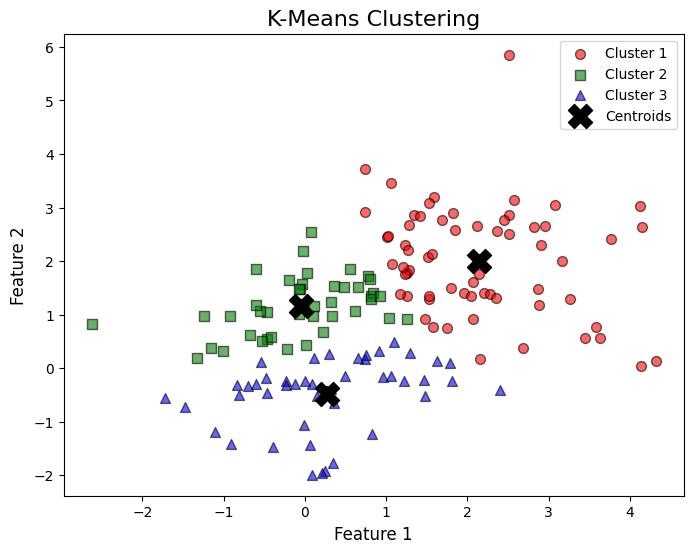

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the clusters and centroids
def plot_clusters(X, clusters, centroids):
    # Define the colors and markers for each cluster
    cluster_colors = ['red', 'green', 'blue']  # Red, Green, Blue for different clusters
    cluster_markers = ['o', 's', '^']  # Circle, Square, Triangle markers

    # Create a figure with specified size
    plt.figure(figsize=(8, 6))

    # Loop through each centroid and plot the corresponding cluster points
    for i in range(len(centroids)):
        # Select the points that belong to the current cluster (i)
        cluster_points = X[clusters == i]
        
        # Plot the points of the current cluster with specific color and marker
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    c=cluster_colors[i],  # Color of the points
                    marker=cluster_markers[i],  # Shape of the points
                    s=50, alpha=0.6, edgecolors='k', label=f'Cluster {i + 1}')  # Point size and transparency
    
    # Plot the centroids using a distinct marker and color (black 'X')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=300, label='Centroids')

    # Add labels next to each centroid to indicate its number
    for i, centroid in enumerate(centroids):
        plt.text(centroid[0], centroid[1], f'{i + 1}', 
                 color='black', fontsize=12, ha='center', va='center')

    # Set the plot title and axis labels
    plt.title("K-Means Clustering", fontsize=16)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)

    # Display a legend showing which color corresponds to which cluster
    plt.legend()

    # Remove gridlines for a cleaner look
    plt.grid(False)
    
    # Show the plot
    plt.show()


# Visualize the clustering result using the plot_clusters function
plot_clusters(X, clusters, centroids)

# When to Use K-Means Clustering 🧑‍💻

K-Means is a simple algorithm used to group similar data points together into clusters. It is widely used for tasks like customer segmentation and data classification. Here are some situations where K-Means is useful:

- **Grouping Similar Data**: K-Means is good for grouping similar items together based on their features. For example, grouping customers based on their buying behavior.

- **Works Well with Large Data**: K-Means can handle big datasets well, especially if the data has fewer features.

- **You Choose the Number of Groups**: K-Means requires you to decide how many clusters (groups) you want before starting.

- **Good for Round Clusters**: It works best when the groups are roughly circular and equally sized.

- **Fast to Run**: K-Means is quick and works well even on large datasets.

# Pros of K-Means ✅

- **Easy to Understand**: The K-Means algorithm is simple and easy to implement, making it a great starting point for beginners.

- **Handles Large Datasets**: K-Means is efficient and can work with large amounts of data.

- **Clear Groups**: K-Means creates clear and distinct groups when the data fits the model.

- **Fast and Efficient**: It runs quickly and doesn't require a lot of computational power.

- **Popular and Useful**: K-Means is widely used in real-world applications like market segmentation and anomaly detection.

# Cons of K-Means ❌

- **Needs the Number of Groups (K)**: You must decide how many clusters you want to create. If you're not sure, it can be difficult to choose the right number.

- **Sensitive to Starting Points**: The algorithm can give different results depending on where the clusters start. This can be fixed by using better starting points (K-Means++).

- **Assumes Round Clusters**: K-Means works best if the groups are circular and have about the same size, which is not always the case.

- **Can Be Affected by Outliers**: K-Means is sensitive to outliers (extreme data points), which can mess up the clusters.

- **Doesn't Handle Complex Shapes**: K-Means struggles with clusters that are not round or have overlapping shapes.

## Conclusion 🎯

K-Means is a simple and powerful way to group data. It works best when the data has clear, well-separated clusters. While it’s easy to use and fast, it’s important to make sure the data fits the model's assumptions, especially when choosing the number of clusters and dealing with outliers.